In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os

(<matplotlib.image.AxesImage at 0x26f43bd2388>, Text(0.5, 1.0, 'Input image'))

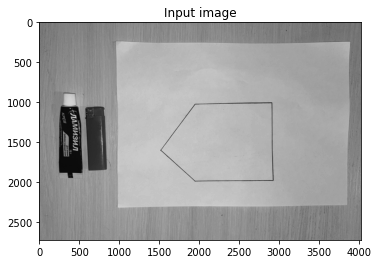

In [166]:
img = cv2.imread("../input/1True.jpg")
# img = cv2.imread("../input/8False.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# do some noise reduction
d = 3
g_sigmaColor = 10
g_sigmaSpace = 10
gray = cv2.bilateralFilter(gray, d, g_sigmaColor, g_sigmaSpace)
plt.imshow(gray, cmap="gray"), plt.title(f"Input image")

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x26f48b5fb48>)

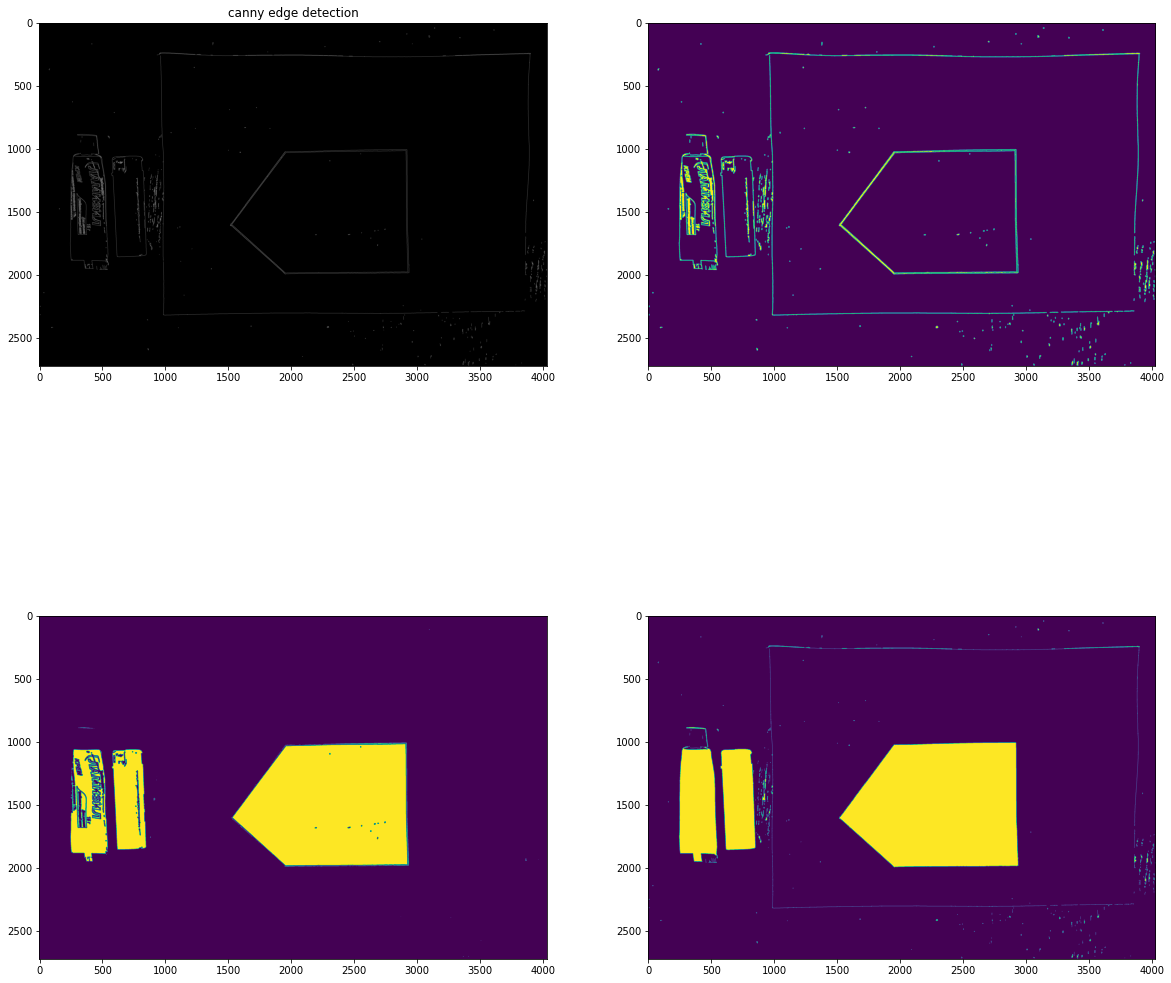

In [169]:
        # now detect edges and floodfill the binary image, dilation allows joining edges with holes
        edges = cv2.Canny(gray, 100, 200)  # works
        im_th = cv2.dilate(edges, np.ones((5, 5), np.uint8), iterations=1)
        im_floodfill = im_th.copy()
        
        # Mask used to flood filling.
        # Notice the size needs to be 2 pixels than the image.
        h, w = im_th.shape[:2]
        mask = np.zeros((h+2, w+2), np.uint8)

        # Floodfill from point (0, 0)
        cv2.floodFill(im_floodfill, mask, (0, 0), 255)
        # Invert floodfilled image
        im_floodfill_inv = cv2.bitwise_not(im_floodfill)
        # Combine the two images to get the foreground.
        im_out =  im_th | im_floodfill_inv

        kernel = np.ones((5, 5), np.uint8)
        im_out = cv2.erode(im_out, kernel, iterations=1)
        plt.figure(figsize=(20,20))
        plt.subplot(2, 2, 1),plt.imshow(edges, cmap="gray"), plt.title(f"canny edge detection")
        plt.subplot(2, 2, 2),plt.imshow(im_th)
        plt.subplot(2, 2, 3),plt.imshow(im_floodfill_inv)
        plt.subplot(2, 2, 4),plt.imshow(im_out)

area brightness: 158.49412305060122
area brightness: 158.49412305060122
area brightness: 158.49412305060122
area brightness: 182.76452513677413
area brightness: 182.76452513677413
area brightness: 182.76452513677413
area brightness: 37.89187350513655
area brightness: 37.89187350513655
area brightness: 37.89187350513655
area brightness: 51.9322328364199
area brightness: 51.9322328364199
area brightness: 51.9322328364199


(<AxesSubplot:title={'center':'Final object'}>,
 Text(0.5, 1.0, 'Final object'))

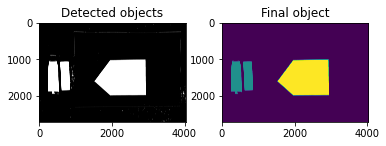

In [168]:
        # Extract objects using connected component labeling
        n_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(im_out, connectivity=4)

        # Create false color image
        colors = np.arange(0, 200, 200 / n_labels).astype(np.uint8)
        colors[0] = 0  
        false_colors = colors[labels]

        max_br = 0
        num_objects = 0
        area_thr = 0.25
        whole_area = im_out.shape[0] * im_out.shape[1]
        brightest_color = 0
        for i in range(len(colors)):
            object_area = np.sum(false_colors == colors[i])
#             print(object_area / whole_area * 100, "Remove:", object_area < whole_area * area_thr / 100)
            if object_area < whole_area * area_thr / 100:
                false_colors[false_colors == colors[i]] = 0
            else:
                num_objects += 1
                print("area brightness:", np.mean(gray[false_colors == colors[i]]))
                cur_br = np.mean(gray[false_colors == colors[i]])
                if colors[i] != 0 and cur_br > max_br:
                    max_br = cur_br
                    brightest_color = colors[i]

        false_colors[false_colors == brightest_color] = 255  # colorize drawn area with the brightest color
        false_colors[np.logical_and(false_colors != 255, false_colors > 0)] = 128  # colorize objects to fit into area
        plt.figure(figsize=(20,20))
        plt.subplot(2, 2, 1),plt.imshow(im_out, cmap="gray"), plt.title(f"Detected objects")
        plt.subplot(2, 2, 2), plt.imshow(false_colors), plt.title(f"Final object")
       